# Bproperty Apartments Dataset Analysis

## Comprehensive Analysis of Dhaka Real Estate Market

This notebook provides a complete analysis of apartment listings scraped from bproperty.com, covering:
- Data Loading and Initial Exploration
- Data Cleaning and Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Price Prediction Modeling

**Dataset Overview:**
- Source: bproperty.com (Dhaka, Bangladesh)
- Content: Apartment listings for sale
- Target Variable: Price (BDT)
- Features: Location, size, amenities, building details, etc.

## 1. Data Loading and Initial Exploration

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Statistical libraries
import scipy.stats as stats
from scipy import stats

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('bproperty_apartments_dhaka.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nData Types:")
print(df.dtypes)

# Display first few rows
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (2997, 22)

Columns: ['title', 'location', 'price', 'url', 'bedrooms', 'bathrooms', 'date', 'builtin_year', 'occupancy_status', 'amenities', 'area_breakdown', 'available_from', 'floor_area(sqft)', 'floor_no', 'listing_date_added', 'listing_is_verified', 'ownership_status', 'price_breakdown', 'purpose', 'type', 'unit_no', 'zip']

Data Types:
title                   object
location                object
price                   object
url                     object
bedrooms               float64
bathrooms              float64
date                    object
builtin_year            object
occupancy_status        object
amenities               object
area_breakdown          object
available_from          object
floor_area(sqft)       float64
floor_no                object
listing_date_added      object
listing_is_verified    float64
ownership_status        object
price_breakdown        float64
purpose                 object
type                    object
unit_no               

,title,location,price,url,bedrooms,bathrooms,date,builtin_year,occupancy_status,amenities,...,floor_area(sqft),floor_no,listing_date_added,listing_is_verified,ownership_status,price_breakdown,purpose,type,unit_no,zip
0,Prominent 1268 Sq Ft Apartment Available for S...,"Rasdia Mouza, Uttara","8,500,000",https://www.bproperty.com/buy/dhaka/uttara/pro...,3.0,3.0,09-08-24,2023,Vacant,"Electricity Backup, Service Elevators, Electri...",...,1268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
1,"Economical 1,200 SFT Flat for Sale in Mirpur","Section 1, Mirpur","8,400,000",https://www.bproperty.com/buy/dhaka/mirpur/eco...,3.0,3.0,09-21-24,2023,Vacant,"Electricity Backup, Elevators in Building, Ele...",...,1200.0,7,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
2,Reasonable 1450 Sq Ft Flat For Sale In Kathalb...,"Kathal Bagan Sonargaon Road, Hatirpool","11,500,000",https://www.bproperty.com/buy/dhaka/hatirpool/...,3.0,4.0,09-20-24,2014,Vacant,"Freehold, Gas, Electricity, Intercom, Balcony ...",...,1450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Secure This 2,500 Sq Ft Apartment for Sale in ...","Block B, Bashundhara R-A","26,000,000",https://www.bproperty.com/buy/dhaka/bashundhar...,4.0,4.0,09-15-24,2013,Occupied,"Electricity Backup, Freehold, Apartment Facing...",...,2500.0,4,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,"Sophisticated 2,370 sq ft residential Apartmen...","Block I, Bashundhara R-A","27,000,000",https://www.bproperty.com/buy/dhaka/bashundhar...,4.0,4.0,09-15-24,2018,Vacant,"Double Glazed Windows, Central Heating, Electr...",...,2370.0,2.0nd,NaN,NaN,NaN,27000000.0,NaN,NaN,2.0,1229.0


In [3]:
# Basic statistics
print("Basic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

Basic Statistics:
          bedrooms    bathrooms  floor_area(sqft)  listing_is_verified  \
count  1420.000000  1420.000000       1420.000000                  1.0   
mean      2.930986     2.863380       1372.908451                  1.0   
std       0.578714     0.751553        522.954984                  NaN   
min       1.000000     1.000000          5.000000                  1.0   
25%       3.000000     2.000000       1080.000000                  1.0   
50%       3.000000     3.000000       1300.000000                  1.0   
75%       3.000000     3.000000       1550.000000                  1.0   
max       8.000000     8.000000       6357.000000                  1.0   

       price_breakdown  unit_no     zip  
count              1.0     15.0     1.0  
mean        27000000.0      3.0  1229.0  
std                NaN      2.0     NaN  
min         27000000.0      1.0  1229.0  
25%         27000000.0      1.5  1229.0  
50%         27000000.0      2.0  1229.0  
75%         27000000.

,Missing Values,Percentage
ownership_status,2996,99.966633
listing_date_added,2996,99.966633
zip,2996,99.966633
listing_is_verified,2996,99.966633
price_breakdown,2996,99.966633
purpose,2995,99.933267
type,2995,99.933267
area_breakdown,2994,99.899900
available_from,2988,99.699700
unit_no,2982,99.499499


## 2. Data Cleaning and Preprocessing

In [4]:
# Create a copy of the dataframe for cleaning
df_clean = df.copy()

# Clean price column - remove commas and convert to numeric
df_clean['price'] = df_clean['price'].str.replace(',', '').astype(float)

# Clean floor_area(sqft) - handle various formats
def clean_area(area_str):
    if pd.isna(area_str) or area_str == '':
        return np.nan
    # Remove commas and extract numeric part
    area_str = str(area_str).replace(',', '')
    # Extract numbers
    import re
    match = re.search(r'(\d+(?:\.\d+)?)', area_str)
    return float(match.group(1)) if match else np.nan

df_clean['floor_area_sqft'] = df_clean['floor_area(sqft)'].apply(clean_area)

# Clean bedrooms and bathrooms - convert to numeric
df_clean['bedrooms'] = pd.to_numeric(df_clean['bedrooms'], errors='coerce')
df_clean['bathrooms'] = pd.to_numeric(df_clean['bathrooms'], errors='coerce')

# Clean builtin_year
df_clean['builtin_year'] = pd.to_numeric(df_clean['builtin_year'], errors='coerce')

# Clean floor_no
def clean_floor_no(floor_str):
    if pd.isna(floor_str) or floor_str == '':
        return np.nan
    floor_str = str(floor_str).lower().strip()
    if 'ground' in floor_str:
        return 0
    # Extract numeric part
    import re
    match = re.search(r'(\d+(?:\.\d+)?)', floor_str)
    return float(match.group(1)) if match else np.nan

df_clean['floor_no_clean'] = df_clean['floor_no'].apply(clean_floor_no)

# Clean occupancy_status - standardize values
df_clean['occupancy_status'] = df_clean['occupancy_status'].str.lower().str.strip()
df_clean['occupancy_status'] = df_clean['occupancy_status'].replace({
    'vacant': 'Vacant',
    'occupied': 'Occupied',
    'rented': 'Rented',
    'yes': 'Vacant'  # assuming 'yes' means vacant
})

# Extract location area from location string
def extract_area(location_str):
    if pd.isna(location_str):
        return 'Unknown'
    # Split by comma and take the last meaningful part
    parts = [part.strip() for part in str(location_str).split(',')]
    # Remove road numbers, block letters, etc.
    for part in reversed(parts):
        if not any(keyword in part.lower() for keyword in ['road', 'block', 'sector', 'section', 'no', 'plot']):
            return part
    return parts[-1] if parts else 'Unknown'

df_clean['area'] = df_clean['location'].apply(extract_area)

print("Data cleaning completed!")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")

Data cleaning completed!
Original shape: (2997, 22)
Cleaned shape: (2997, 25)


In [5]:
# Handle missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Fill missing numeric values with median
numeric_cols = ['bedrooms', 'bathrooms', 'builtin_year', 'floor_area_sqft', 'floor_no_clean']
for col in numeric_cols:
    if col in df_clean.columns:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
        print(f"Filled {col} missing values with median: {median_val}")

# Fill categorical missing values
df_clean['occupancy_status'] = df_clean['occupancy_status'].fillna('Unknown')
df_clean['area'] = df_clean['area'].fillna('Unknown')

# Remove rows with missing price (target variable)
df_clean = df_clean.dropna(subset=['price'])

print(f"\nFinal dataset shape after cleaning: {df_clean.shape}")
print(f"Removed {len(df) - len(df_clean)} rows with missing price")

Missing values before cleaning:
title                  1534
location               1536
price                  1534
url                    1494
bedrooms               1577
bathrooms              1577
date                   2956
builtin_year           2957
occupancy_status       1577
amenities              1579
area_breakdown         2994
available_from         2988
floor_area(sqft)       1577
floor_no               1608
listing_date_added     2996
listing_is_verified    2996
ownership_status       2996
price_breakdown        2996
purpose                2995
type                   2995
unit_no                2982
zip                    2996
floor_area_sqft        1577
floor_no_clean         1608
dtype: int64
Filled bedrooms missing values with median: 3.0
Filled bathrooms missing values with median: 3.0
Filled builtin_year missing values with median: 2022.0
Filled floor_area_sqft missing values with median: 1300.0
Filled floor_no_clean missing values with median: 4.0

Final dataset shap

In [6]:
# # Outlier detection and removal using IQR method
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Remove outliers for key numeric columns
# outlier_cols = ['price', 'floor_area_sqft', 'bedrooms', 'bathrooms']
# df_no_outliers = df_clean.copy()

# for col in outlier_cols:
#     if col in df_no_outliers.columns:
#         before_count = len(df_no_outliers)
#         df_no_outliers = remove_outliers_iqr(df_no_outliers, col)
#         after_count = len(df_no_outliers)
#         print(f"Removed {before_count - after_count} outliers from {col}")

# print(f"\nDataset shape after outlier removal: {df_no_outliers.shape}")

# # Use the cleaned dataset without extreme outliers for analysis
# df_final = df_no_outliers.copy()
df_final = df_clean.copy()

In [10]:
df_final.shape

(1463, 25)

## 3. Exploratory Data Analysis (EDA)

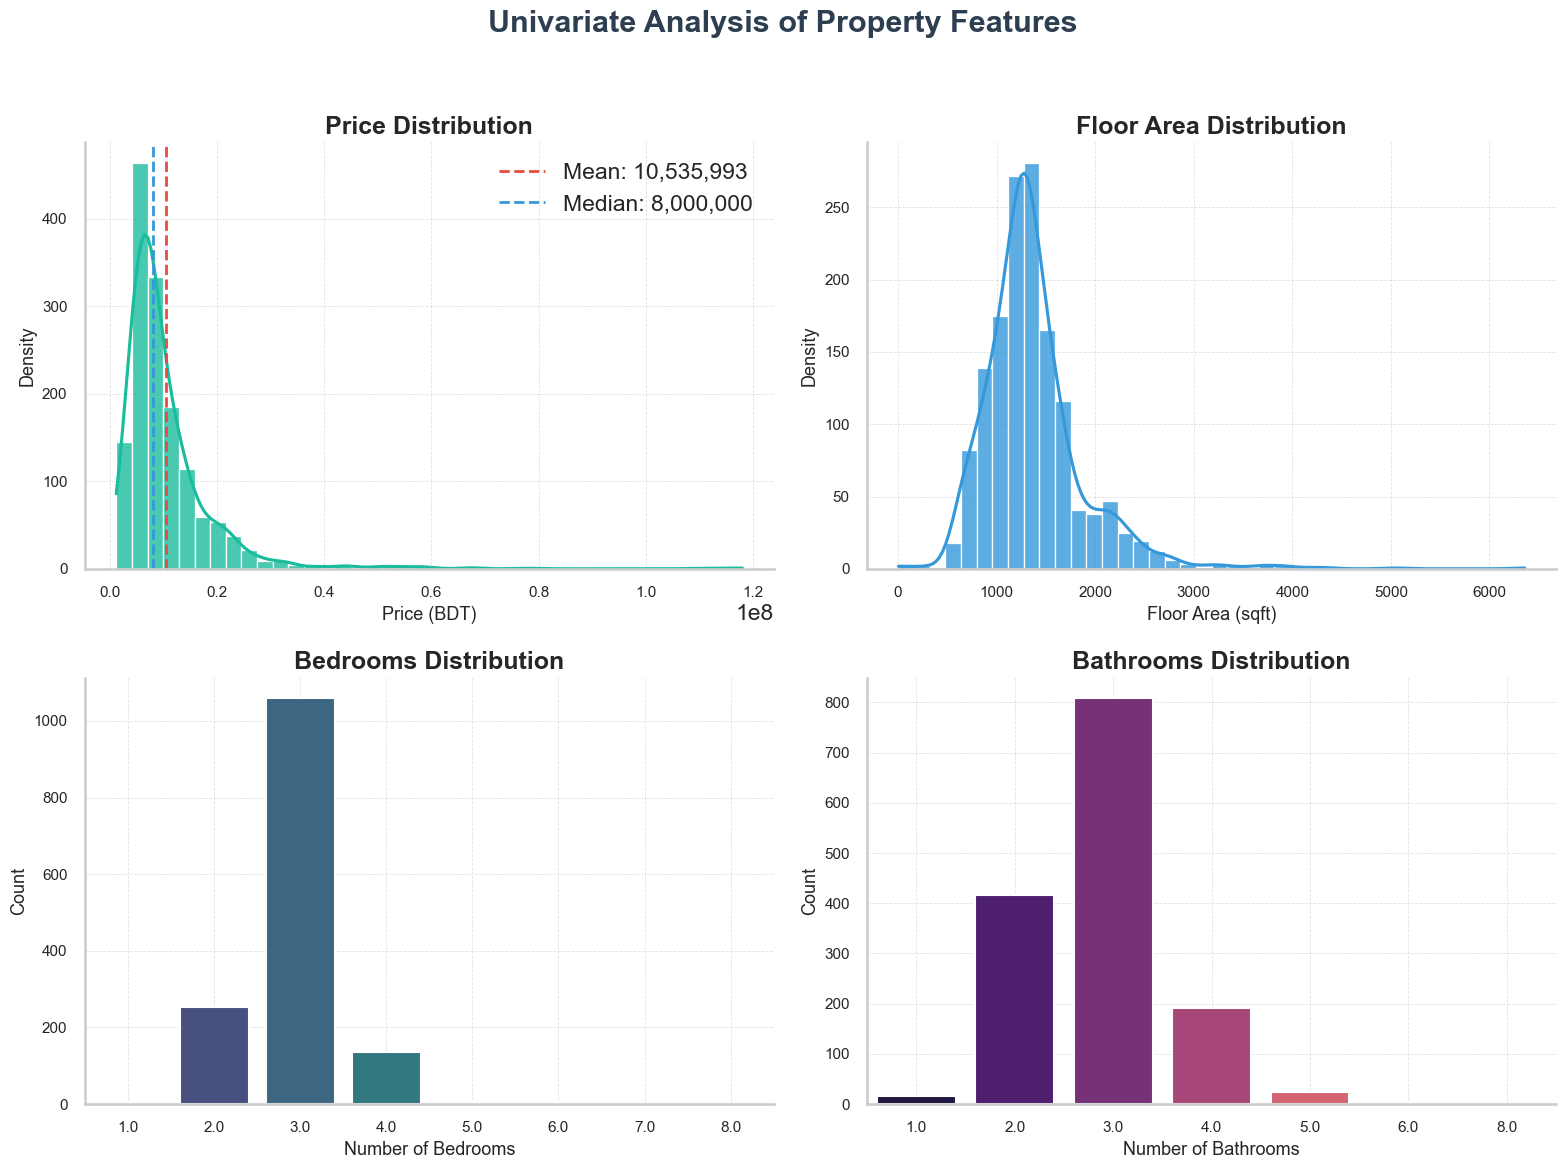

🏡 Price Statistics (BDT):
count    1.463000e+03
mean     1.053599e+07
std      9.240880e+06
min      1.231231e+06
25%      5.600000e+06
50%      8.000000e+06
75%      1.220000e+07
max      1.180000e+08

Price Range: 1,231,231 – 118,000,000
Most Common Price: 5,500,000


In [11]:
# Modern theme
sns.set_theme(style="whitegrid", context="talk")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Univariate Analysis of Property Features", fontsize=22, fontweight="bold", color="#2C3E50")

# Custom color palette
main_color = "#1ABC9C"
accent_color = "#E74C3C"
secondary_color = "#3498DB"

# --- Price Distribution ---
sns.histplot(df_final['price'], bins=40, kde=True, ax=axes[0, 0],
             color=main_color, alpha=0.8, edgecolor=None)
axes[0, 0].axvline(df_final['price'].mean(), color=accent_color, linestyle='--', lw=2, label=f"Mean: {df_final['price'].mean():,.0f}")
axes[0, 0].axvline(df_final['price'].median(), color=secondary_color, linestyle='--', lw=2, label=f"Median: {df_final['price'].median():,.0f}")
axes[0, 0].legend(frameon=False)
axes[0, 0].set_title("Price Distribution", fontsize=18, fontweight="semibold")
axes[0, 0].set_xlabel("Price (BDT)", fontsize=13)
axes[0, 0].set_ylabel("Density", fontsize=13)

# --- Floor Area Distribution ---
sns.histplot(df_final['floor_area_sqft'], bins=40, kde=True, ax=axes[0, 1],
             color=secondary_color, alpha=0.8)
axes[0, 1].set_title("Floor Area Distribution", fontsize=18, fontweight="semibold")
axes[0, 1].set_xlabel("Floor Area (sqft)", fontsize=13)
axes[0, 1].set_ylabel("Density", fontsize=13)

# --- Bedrooms Distribution ---
bedroom_counts = df_final['bedrooms'].value_counts().sort_index()
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, ax=axes[1, 0],
            palette="viridis", edgecolor=None)
axes[1, 0].set_title("Bedrooms Distribution", fontsize=18, fontweight="semibold")
axes[1, 0].set_xlabel("Number of Bedrooms", fontsize=13)
axes[1, 0].set_ylabel("Count", fontsize=13)

# --- Bathrooms Distribution ---
bathroom_counts = df_final['bathrooms'].value_counts().sort_index()
sns.barplot(x=bathroom_counts.index, y=bathroom_counts.values, ax=axes[1, 1],
            palette="magma", edgecolor=None)
axes[1, 1].set_title("Bathrooms Distribution", fontsize=18, fontweight="semibold")
axes[1, 1].set_xlabel("Number of Bathrooms", fontsize=13)
axes[1, 1].set_ylabel("Count", fontsize=13)

# --- Styling ---
for ax in axes.flat:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
    ax.tick_params(axis="both", labelsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Summary Statistics ---
print("🏡 Price Statistics (BDT):")
print(df_final['price'].describe().to_string())
print(f"\nPrice Range: {df_final['price'].min():,.0f} – {df_final['price'].max():,.0f}")
print(f"Most Common Price: {df_final['price'].mode().iloc[0]:,.0f}")

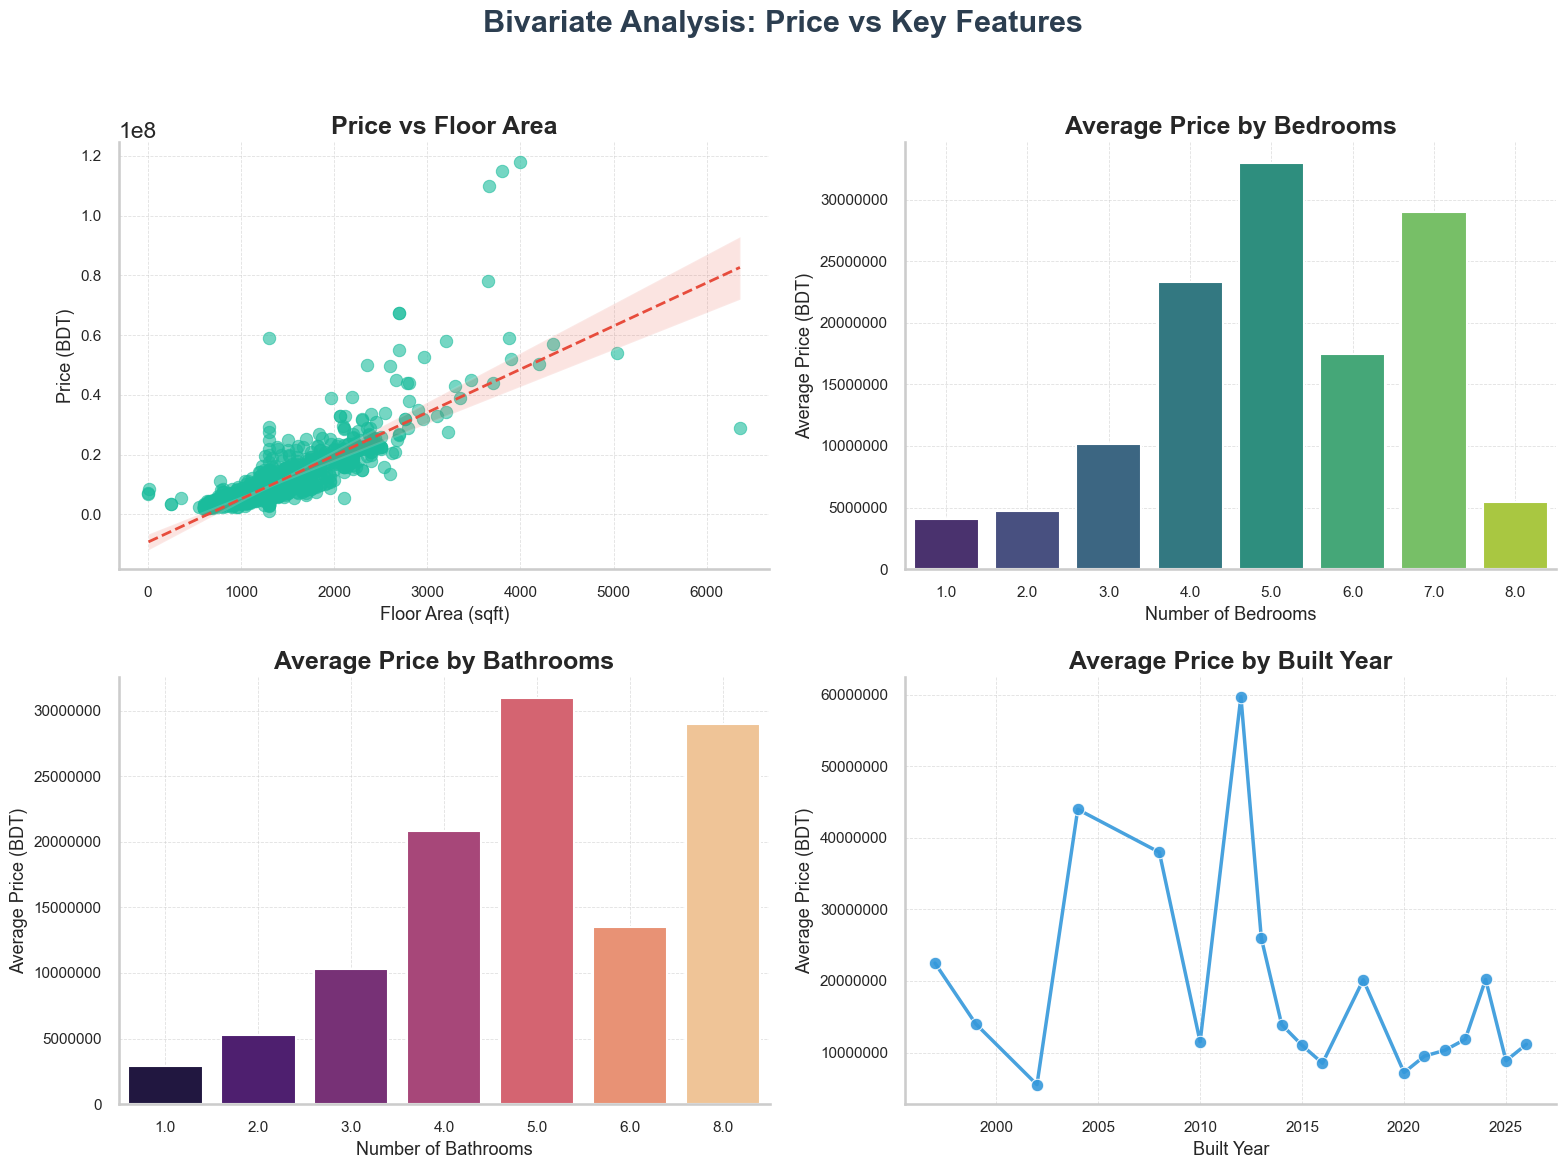

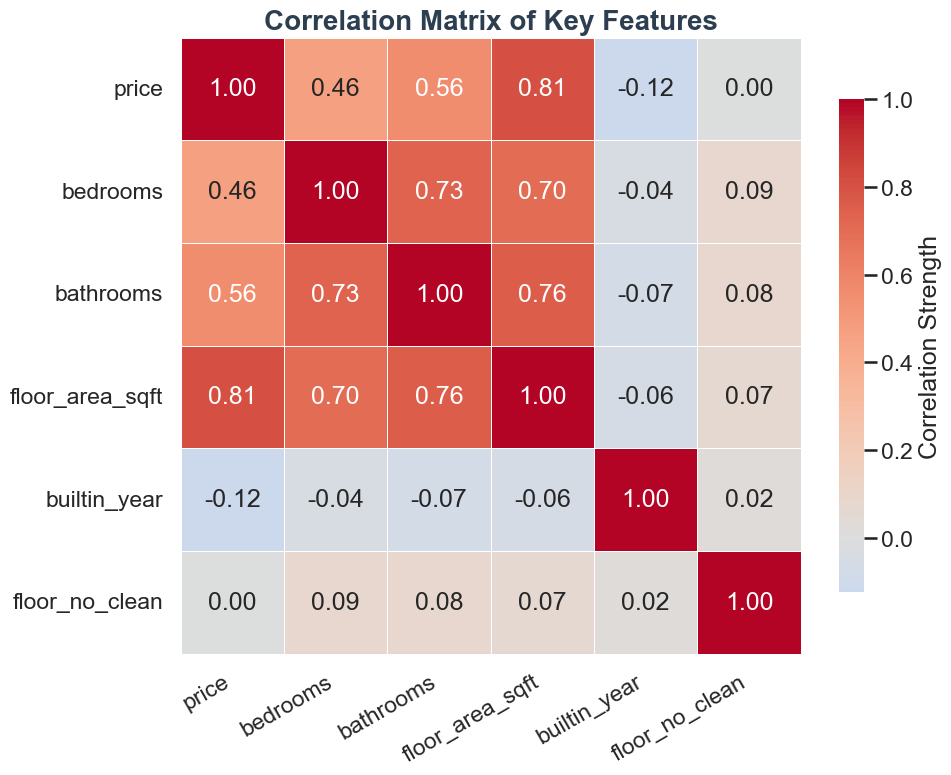

🔗 Correlation with Price:
price              1.000000
floor_area_sqft    0.806405
bathrooms          0.555648
bedrooms           0.464886
floor_no_clean     0.002451
builtin_year      -0.123575
Name: price, dtype: float64


In [12]:
# Apply a modern theme
sns.set_theme(style="whitegrid", context="talk")

# --- Setup ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Bivariate Analysis: Price vs Key Features", fontsize=22, fontweight="bold", color="#2C3E50")

# Define colors
main_color = "#1ABC9C"
accent_color = "#E74C3C"
secondary_color = "#3498DB"

# --- 1️⃣ Price vs Floor Area ---
sns.scatterplot(
    x='floor_area_sqft', y='price',
    data=df_final, ax=axes[0, 0],
    color=main_color, alpha=0.6, edgecolor=None, s=80
)
# Add regression line
sns.regplot(
    x='floor_area_sqft', y='price',
    data=df_final, ax=axes[0, 0],
    scatter=False, color=accent_color, line_kws={'lw': 2, 'ls': '--'}
)
axes[0, 0].set_title("Price vs Floor Area", fontsize=18, fontweight="semibold")
axes[0, 0].set_xlabel("Floor Area (sqft)", fontsize=13)
axes[0, 0].set_ylabel("Price (BDT)", fontsize=13)

# --- 2️⃣ Price vs Bedrooms ---
bedroom_price = df_final.groupby('bedrooms')['price'].mean().reset_index()
sns.barplot(
    x='bedrooms', y='price',
    data=bedroom_price, ax=axes[0, 1],
    palette="viridis", edgecolor=None
)
axes[0, 1].set_title("Average Price by Bedrooms", fontsize=18, fontweight="semibold")
axes[0, 1].set_xlabel("Number of Bedrooms", fontsize=13)
axes[0, 1].set_ylabel("Average Price (BDT)", fontsize=13)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# --- 3️⃣ Price vs Bathrooms ---
bathroom_price = df_final.groupby('bathrooms')['price'].mean().reset_index()
sns.barplot(
    x='bathrooms', y='price',
    data=bathroom_price, ax=axes[1, 0],
    palette="magma", edgecolor=None
)
axes[1, 0].set_title("Average Price by Bathrooms", fontsize=18, fontweight="semibold")
axes[1, 0].set_xlabel("Number of Bathrooms", fontsize=13)
axes[1, 0].set_ylabel("Average Price (BDT)", fontsize=13)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# --- 4️⃣ Price vs Built Year ---
year_price = df_final.groupby('builtin_year')['price'].mean().reset_index()
sns.lineplot(
    x='builtin_year', y='price',
    data=year_price, ax=axes[1, 1],
    color=secondary_color, marker='o', linewidth=2.5, alpha=0.9
)
axes[1, 1].set_title("Average Price by Built Year", fontsize=18, fontweight="semibold")
axes[1, 1].set_xlabel("Built Year", fontsize=13)
axes[1, 1].set_ylabel("Average Price (BDT)", fontsize=13)
axes[1, 1].ticklabel_format(style='plain', axis='y')

# --- Layout polish ---
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
    ax.tick_params(axis="both", labelsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 🔥 Correlation Matrix ---
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'floor_area_sqft', 'builtin_year', 'floor_no_clean']
corr_matrix = df_final[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap="coolwarm",
    center=0, fmt=".2f", linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Strength'}
)
plt.title("Correlation Matrix of Key Features", fontsize=20, fontweight="bold", color="#2C3E50")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.show()

# --- Correlation summary ---
print("🔗 Correlation with Price:")
print(corr_matrix['price'].sort_values(ascending=False))

🏙️ Top 10 Areas by Average Price:
                  avg_price  count   min_price    max_price  avg_area
area                                                                 
Gulshan          68811111.0      9  39000000.0  118000000.0    2865.0
Lalmatia         27865000.0      8  14000000.0   43000000.0    1951.0
Dhanmondi        20581603.0     29   6200000.0   49500000.0    1744.0
Bashundhara R-A  17711039.0    165   3400000.0   59000000.0    1893.0
Uttara           15319483.0    116   4800000.0   57000000.0    1666.0
Shiddheswari     14925000.0      7   7500000.0   31500000.0    1464.0
Kathalbagan      14716667.0      6   9000000.0   22500000.0    1294.0
Shantinagar      13488600.0      5   7500000.0   19643000.0    1274.0
Shyamoli         12464286.0      7   4000000.0   23000000.0    1500.0
Tejgaon          12046111.0      9   6500000.0   20000000.0    1357.0


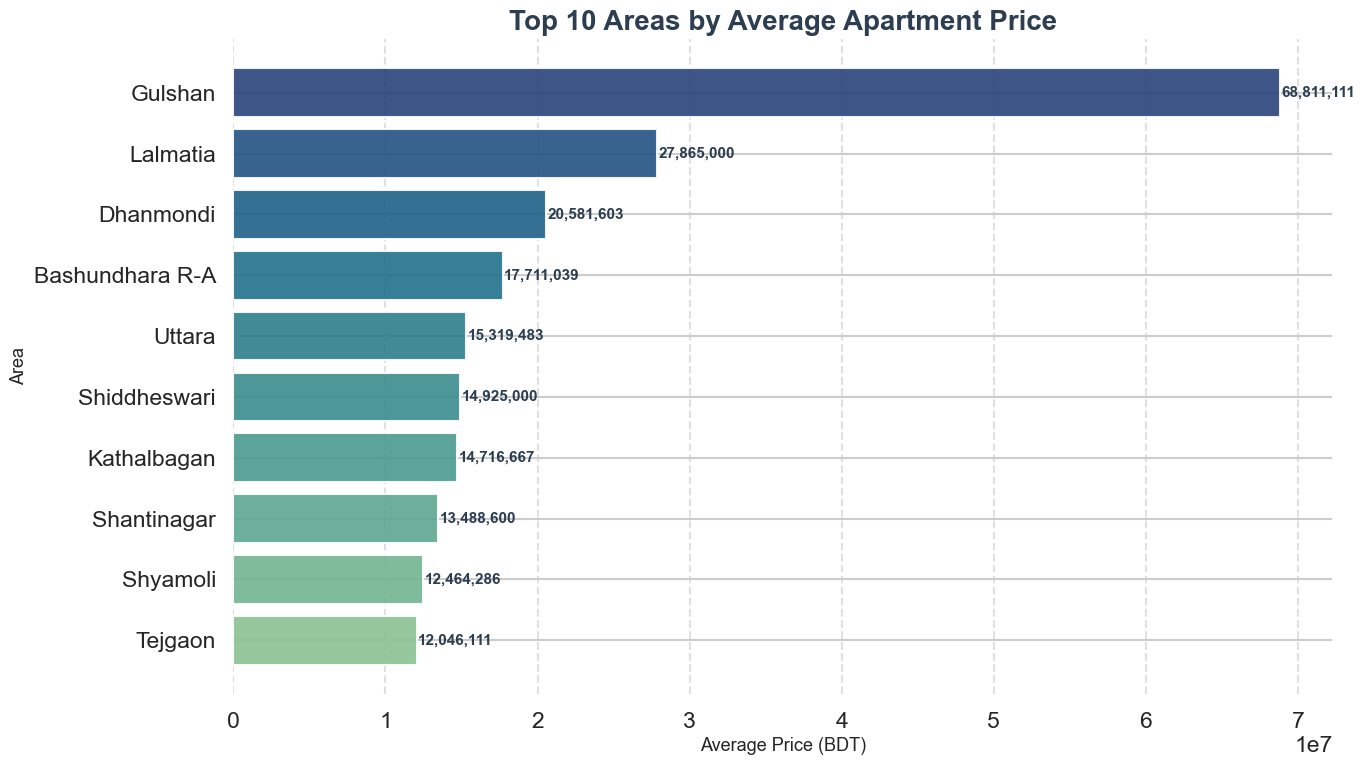

In [15]:
# Apply consistent modern theme
sns.set_theme(style="whitegrid", context="talk")

# ================================
# 📍 Location-based Analysis
# ================================
area_stats = df_final.groupby('area').agg({
    'price': ['mean', 'count', 'min', 'max'],
    'floor_area_sqft': 'mean'
}).round(0)

area_stats.columns = ['avg_price', 'count', 'min_price', 'max_price', 'avg_area']
area_stats = area_stats[area_stats['count'] >= 5].sort_values('avg_price', ascending=False)

print("🏙️ Top 10 Areas by Average Price:")
print(area_stats.head(10))

# --- Top 10 Areas Visualization ---
top_areas = area_stats.head(10).iloc[::-1]  # reverse for top-down view

plt.figure(figsize=(14, 8))
bar_colors = sns.color_palette("crest", n_colors=len(top_areas))
bars = plt.barh(top_areas.index, top_areas['avg_price'], color=bar_colors, alpha=0.9)

plt.title("Top 10 Areas by Average Apartment Price", fontsize=20, fontweight="bold", color="#2C3E50")
plt.xlabel("Average Price (BDT)", fontsize=13)
plt.ylabel("Area", fontsize=13)

# Add price labels
for bar, value in zip(bars, top_areas['avg_price']):
    plt.text(value + 100000, bar.get_y() + bar.get_height()/2,
             f"{value:,.0f}", va='center', fontsize=11, color="#2C3E50", fontweight="semibold")

plt.grid(axis='x', linestyle="--", alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# # ================================
# # 🏠 Occupancy Status Analysis
# # ================================
# occupancy_stats = df_final.groupby('occupancy_status')['price'].agg(['mean', 'count']).round(0)
# occupancy_stats = occupancy_stats.sort_values('mean', ascending=False).reset_index()

# plt.figure(figsize=(12, 7))
# sns.barplot(
#     x='occupancy_status',
#     y='mean',
#     data=occupancy_stats,
#     palette="viridis",
#     edgecolor=None,
#     alpha=0.9
# )

# plt.title("Average Apartment Price by Occupancy Status", fontsize=20, fontweight="bold", color="#2C3E50")
# plt.xlabel("Occupancy Status", fontsize=13)
# plt.ylabel("Average Price (BDT)", fontsize=13)
# plt.xticks(rotation=25, ha='right')

# # Add labels above bars
# for i, row in occupancy_stats.iterrows():
#     plt.text(i, row['mean'] + 70000, f"n={int(row['count'])}", ha='center', fontsize=11, color="#2C3E50", fontweight="medium")

# plt.grid(axis='y', linestyle="--", alpha=0.6)
# sns.despine(left=True, bottom=True)
# plt.tight_layout()
# plt.show()

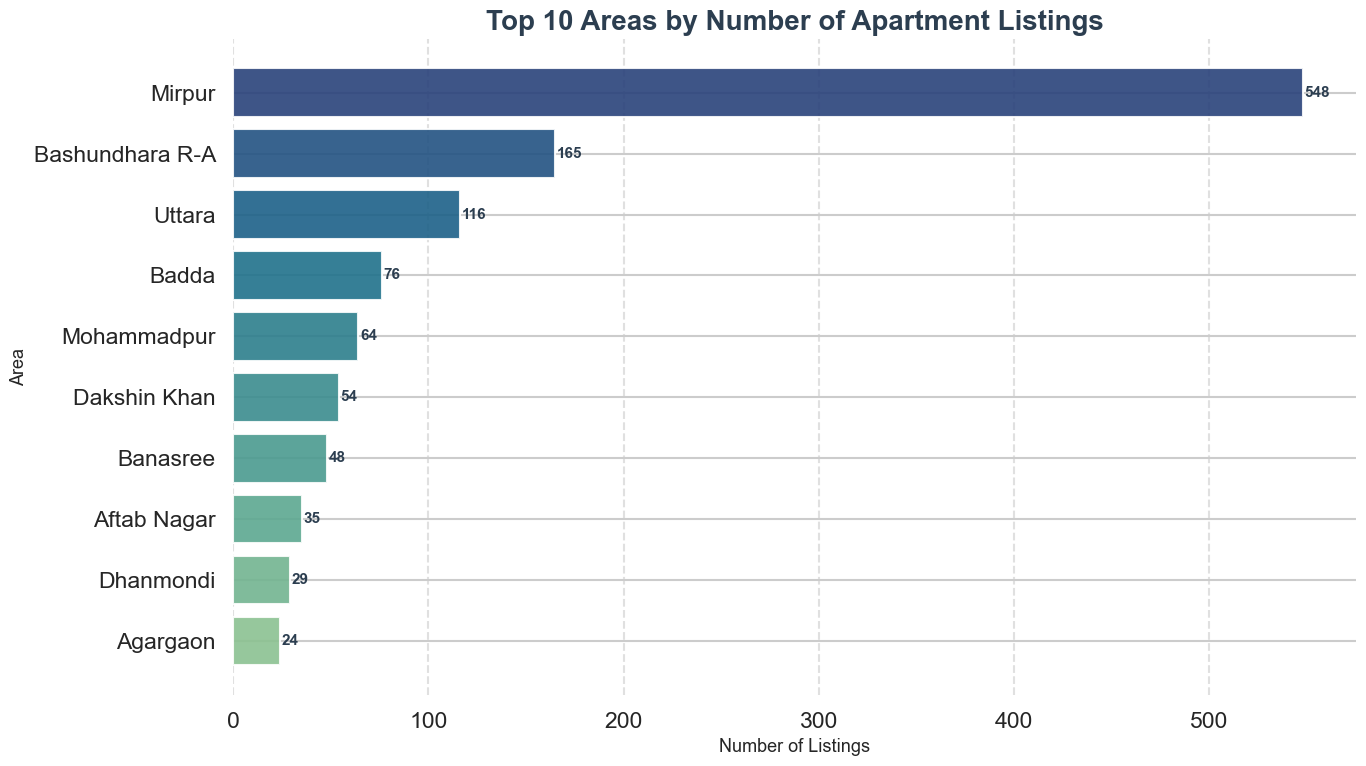

🏙️ Top 10 Areas by Listing Count:
1. Mirpur: 548 listings
2. Bashundhara R-A: 165 listings
3. Uttara: 116 listings
4. Badda: 76 listings
5. Mohammadpur: 64 listings
6. Dakshin Khan: 54 listings
7. Banasree: 48 listings
8. Aftab Nagar: 35 listings
9. Dhanmondi: 29 listings
10. Agargaon: 24 listings

💵 Price Statistics by Top 5 Areas:

📍 Mirpur
   • Listings: 548
   • Mean:    6,821,253 BDT
   • Median:  6,300,000 BDT
   • Min:     1,620,000 BDT
   • Max:     27,000,000 BDT

📍 Bashundhara R-A
   • Listings: 165
   • Mean:    17,711,039 BDT
   • Median:  16,000,000 BDT
   • Min:     3,400,000 BDT
   • Max:     59,000,000 BDT

📍 Uttara
   • Listings: 116
   • Mean:    15,319,483 BDT
   • Median:  13,200,000 BDT
   • Min:     4,800,000 BDT
   • Max:     57,000,000 BDT

📍 Badda
   • Listings: 76
   • Mean:    9,274,872 BDT
   • Median:  8,250,000 BDT
   • Min:     3,500,000 BDT
   • Max:     23,000,000 BDT

📍 Mohammadpur
   • Listings: 64
   • Mean:    8,989,625 BDT
   • Median:  7,215,000 B

In [16]:
# Apply consistent modern theme
sns.set_theme(style="whitegrid", context="talk")

# ================================
# 📊 Location-based Analysis
# ================================

# --- Top areas by listing count ---
area_counts = df_final['area'].value_counts().head(10)
top_areas = area_counts.iloc[::-1]  # reverse for top-down order

plt.figure(figsize=(14, 8))
bar_colors = sns.color_palette("crest", n_colors=len(top_areas))

bars = plt.barh(top_areas.index, top_areas.values, color=bar_colors, alpha=0.9)

plt.title("Top 10 Areas by Number of Apartment Listings", fontsize=20, fontweight="bold", color="#2C3E50")
plt.xlabel("Number of Listings", fontsize=13)
plt.ylabel("Area", fontsize=13)

# Add count labels
for bar, count in zip(bars, top_areas.values):
    plt.text(count + 1, bar.get_y() + bar.get_height()/2,
             f"{count}", va='center', fontsize=11, color="#2C3E50", fontweight="semibold")

plt.grid(axis='x', linestyle="--", alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# --- Print Top 10 Areas ---
print("🏙️ Top 10 Areas by Listing Count:")
for i, (area, count) in enumerate(area_counts.items(), 1):
    print(f"{i}. {area}: {count} listings")

# ================================
# 💰 Price Statistics by Top Areas
# ================================
print("\n💵 Price Statistics by Top 5 Areas:\n")

for area in area_counts.index[:5]:
    area_data = df_final[df_final['area'] == area]['price']
    print(f"📍 {area}")
    print(f"   • Listings: {len(area_data)}")
    print(f"   • Mean:    {area_data.mean():,.0f} BDT")
    print(f"   • Median:  {area_data.median():,.0f} BDT")
    print(f"   • Min:     {area_data.min():,.0f} BDT")
    print(f"   • Max:     {area_data.max():,.0f} BDT\n")

## 4. Data Preprocessing for Modeling

In [17]:
# Select relevant features for modeling
features_for_modeling = [
    'bedrooms', 'bathrooms', 'floor_area_sqft', 'builtin_year',
    'area', 'occupancy_status', 'amenities'
]

# Create modeling dataframe
df_modeling = df_final[features_for_modeling + ['price']].copy()

# Handle remaining missing values with median imputation
numeric_cols = ['bedrooms', 'bathrooms', 'floor_area_sqft', 'builtin_year']
for col in numeric_cols:
    if df_modeling[col].isnull().sum() > 0:
        median_val = df_modeling[col].median()
        df_modeling[col] = df_modeling[col].fillna(median_val)
        print(f"Filled missing values in {col} with median: {median_val}")

# Fill categorical missing values
df_modeling['area'] = df_modeling['area'].fillna('Unknown')
df_modeling['occupancy_status'] = df_modeling['occupancy_status'].fillna('Unknown')

# Encode categorical location variable (top 20 locations + 'Other')
top_20_areas = df_modeling['area'].value_counts().head(20).index
df_modeling['area_encoded'] = df_modeling['area'].apply(lambda x: x if x in top_20_areas else 'Other')

# Create dummy variables for locations using one-hot encoding
area_dummies = pd.get_dummies(df_modeling['area_encoded'], prefix='area', drop_first=True)

# Prepare feature matrix (X) and target variable (y)
X_numerical = df_modeling[['bedrooms', 'bathrooms', 'floor_area_sqft', 'builtin_year']]
X_categorical = area_dummies
X = pd.concat([X_numerical, X_categorical], axis=1)
y = df_modeling['price']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Features: {list(X.columns)}")
print(f"Target: price")

Feature matrix shape: (1463, 24)
Target variable shape: (1463,)
Features: ['bedrooms', 'bathrooms', 'floor_area_sqft', 'builtin_year', 'area_Aftab Nagar', 'area_Agargaon', 'area_Badda', 'area_Banasree', 'area_Bashundhara R-A', 'area_Cantonment', 'area_Dakshin Khan', 'area_Dhanmondi', 'area_Hazaribag', 'area_Ibrahimpur', 'area_Khilkhet', 'area_Maghbazar', 'area_Malibagh', 'area_Mirpur', 'area_Mohammadpur', 'area_Other', 'area_Rampura', 'area_Shyampur', 'area_Turag', 'area_Uttara']
Target: price


In [18]:
# Create features for modeling
df_model = df_final.copy()

# Price per square foot
df_model['price_per_sqft'] = df_model['price'] / df_model['floor_area_sqft']

# Building age
current_year = 2024  # Assuming current year
df_model['building_age'] = current_year - df_model['builtin_year']

# Bedroom to bathroom ratio
df_model['bed_bath_ratio'] = df_model['bedrooms'] / df_model['bathrooms'].replace(0, 1)  # Avoid division by zero

# Area price ranking (ordinal encoding)
area_avg_price = df_model.groupby('area')['price'].mean().sort_values(ascending=False)
area_rank_dict = {area: rank for rank, area in enumerate(area_avg_price.index, 1)}
df_model['area_price_rank'] = df_model['area'].map(area_rank_dict)

# Occupancy status encoding
occupancy_mapping = {
    'Vacant': 3,
    'Rented': 2,
    'Occupied': 1,
    'Unknown': 0
}
df_model['occupancy_encoded'] = df_model['occupancy_status'].map(occupancy_mapping)

# Amenities count (simplified - count amenities separated by commas)
def count_amenities(amenities_str):
    if pd.isna(amenities_str) or amenities_str == '':
        return 0
    return len(str(amenities_str).split(','))

df_model['amenities_count'] = df_model['amenities'].apply(count_amenities)

# Select features for modeling
numeric_features = [
    'bedrooms', 'bathrooms', 'floor_area_sqft', 'building_age',
    'bed_bath_ratio', 'area_price_rank', 'occupancy_encoded',
    'amenities_count', 'floor_no_clean'
]

categorical_features = ['area', 'occupancy_status']

target = 'price'

print("Features created:")
print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")
print(f"Target: {target}")

# Check feature correlations with target
feature_corr = df_model[numeric_features + [target]].corr()[target].sort_values(ascending=False)
print("\nFeature correlations with price:")
print(feature_corr)

Features created:
Numeric features: ['bedrooms', 'bathrooms', 'floor_area_sqft', 'building_age', 'bed_bath_ratio', 'area_price_rank', 'occupancy_encoded', 'amenities_count', 'floor_no_clean']
Categorical features: ['area', 'occupancy_status']
Target: price

Feature correlations with price:
price                1.000000
floor_area_sqft      0.806405
bathrooms            0.555648
bedrooms             0.464886
amenities_count      0.160801
building_age         0.123575
floor_no_clean       0.002451
occupancy_encoded   -0.033278
bed_bath_ratio      -0.253324
area_price_rank     -0.579030
Name: price, dtype: float64


In [19]:
# Create bedroom categories
def categorize_bedrooms(bedrooms):
    if bedrooms <= 1:
        return '1 BR'
    elif bedrooms == 2:
        return '2 BR'
    elif bedrooms == 3:
        return '3 BR'
    elif bedrooms == 4:
        return '4 BR'
    else:
        return '5+ BR'

df_model['bedroom_category'] = df_model['bedrooms'].apply(categorize_bedrooms)

# Create binary features
df_model['is_verified'] = df_model['listing_is_verified'].notna().astype(int)
df_model['has_ownership_info'] = df_model['ownership_status'].notna().astype(int)

# Additional features
df_model['is_vacant'] = (df_model['occupancy_status'] == 'Vacant').astype(int)
df_model['is_modern'] = (df_model['builtin_year'] >= 2010).astype(int)

print("Additional features created:")
print("- bedroom_category: Categorical bedroom groups")
print("- is_verified: Binary feature for listing verification")
print("- has_ownership_info: Binary feature for ownership status")
print("- is_vacant: Binary feature for vacant properties")
print("- is_modern: Binary feature for modern buildings (2010+)")

Additional features created:
- bedroom_category: Categorical bedroom groups
- is_verified: Binary feature for listing verification
- has_ownership_info: Binary feature for ownership status
- is_vacant: Binary feature for vacant properties
- is_modern: Binary feature for modern buildings (2010+)


## 5. Train-Test Split

In [20]:
# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Apply StandardScaler to scale features (for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler")
print(f"Scaler mean: {scaler.mean_[:5]}...")  # Show first 5 means
print(f"Scaler scale: {scaler.scale_[:5]}...")  # Show first 5 scales

Training set shape: (1170, 24)
Testing set shape: (293, 24)
Training target shape: (1170,)
Testing target shape: (293,)

Features scaled using StandardScaler
Scaler mean: [2.93247863e+00 2.87264957e+00 1.36961368e+03 2.02189145e+03
 2.39316239e-02]...
Scaler scale: [5.93170398e-01 7.61254468e-01 5.26610784e+02 1.37350215e+00
 1.52836191e-01]...


In [21]:
# Train 5 different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate metrics
    results[name] = {
        'MAE_train': mean_absolute_error(y_train, y_pred_train),
        'MAE_test': mean_absolute_error(y_test, y_pred_test),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'R2_train': r2_score(y_train, y_pred_train),
        'R2_test': r2_score(y_test, y_pred_test)
    }

## 6. Model Comparison

📊 Model Performance Comparison:
                      MAE_train      MAE_test    RMSE_train     RMSE_test  \
Linear Regression  2.642399e+06  2.531840e+06  5.105894e+06  4.531350e+06   
Ridge Regression   2.639253e+06  2.528531e+06  5.105920e+06  4.529346e+06   
Lasso Regression   2.642399e+06  2.531840e+06  5.105894e+06  4.531349e+06   
Random Forest      9.995094e+05  2.107300e+06  1.877308e+06  4.243248e+06   
Gradient Boosting  1.591719e+06  2.084250e+06  2.323233e+06  4.510206e+06   

                   R2_train  R2_test  
Linear Regression    0.7056   0.7167  
Ridge Regression     0.7056   0.7169  
Lasso Regression     0.7056   0.7167  
Random Forest        0.9602   0.7515  
Gradient Boosting    0.9390   0.7193  


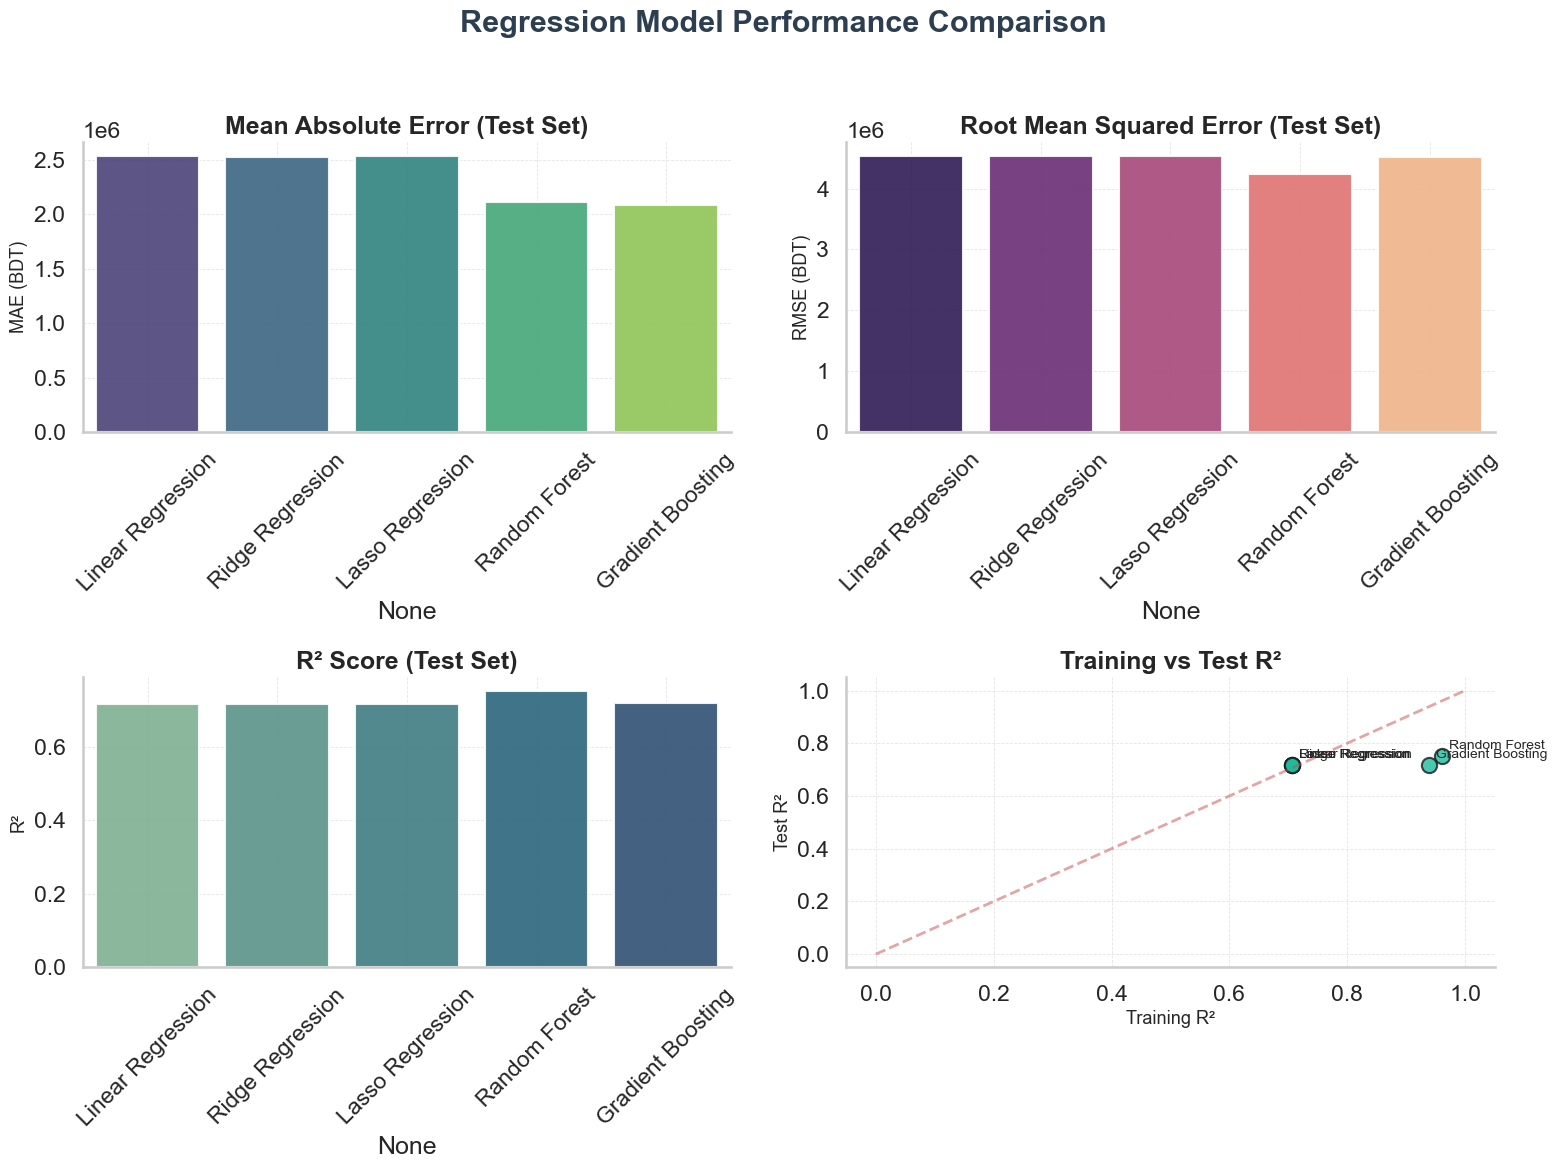


🏆 Best Performing Model: Random Forest
• R² Score: 0.7515
• MAE: 2,107,300 BDT
• RMSE: 4,243,248 BDT


In [22]:
# Set modern Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# --- Display results dataframe ---
results_df = pd.DataFrame(results).T
print("📊 Model Performance Comparison:")
print(results_df.round(4))

# --- Plotting ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Regression Model Performance Comparison", fontsize=22, fontweight="bold", color="#2C3E50")

# Colors
main_color = "#1ABC9C"
accent_color = "#E74C3C"
secondary_color = "#3498DB"

# --- 1️⃣ MAE (Test Set) ---
sns.barplot(
    x=results_df.index, y=results_df['MAE_test'],
    ax=axes[0, 0], palette="viridis", edgecolor=None, alpha=0.9
)
axes[0, 0].set_title("Mean Absolute Error (Test Set)", fontsize=18, fontweight="semibold")
axes[0, 0].set_ylabel("MAE (BDT)", fontsize=13)
axes[0, 0].tick_params(axis='x', rotation=45)

# --- 2️⃣ RMSE (Test Set) ---
sns.barplot(
    x=results_df.index, y=results_df['RMSE_test'],
    ax=axes[0, 1], palette="magma", edgecolor=None, alpha=0.9
)
axes[0, 1].set_title("Root Mean Squared Error (Test Set)", fontsize=18, fontweight="semibold")
axes[0, 1].set_ylabel("RMSE (BDT)", fontsize=13)
axes[0, 1].tick_params(axis='x', rotation=45)

# --- 3️⃣ R² Score (Test Set) ---
sns.barplot(
    x=results_df.index, y=results_df['R2_test'],
    ax=axes[1, 0], palette="crest", edgecolor=None, alpha=0.9
)
axes[1, 0].set_title("R² Score (Test Set)", fontsize=18, fontweight="semibold")
axes[1, 0].set_ylabel("R²", fontsize=13)
axes[1, 0].tick_params(axis='x', rotation=45)

# --- 4️⃣ Training vs Test R² ---
axes[1, 1].scatter(
    results_df['R2_train'], results_df['R2_test'],
    s=120, color=main_color, alpha=0.8, edgecolor="k"
)
axes[1, 1].plot([0, 1], [0, 1], 'r--', alpha=0.5, lw=2)
axes[1, 1].set_xlabel("Training R²", fontsize=13)
axes[1, 1].set_ylabel("Test R²", fontsize=13)
axes[1, 1].set_title("Training vs Test R²", fontsize=18, fontweight="semibold")

# Annotate model names
for i, model_name in enumerate(results_df.index):
    axes[1, 1].annotate(model_name,
                        (results_df['R2_train'][i], results_df['R2_test'][i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=10)

# Layout adjustments
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Identify best model ---
best_model_name = results_df['R2_test'].idxmax()
best_model = models[best_model_name]

print(f"\n🏆 Best Performing Model: {best_model_name}")
print(f"• R² Score: {results_df.loc[best_model_name, 'R2_test']:.4f}")
print(f"• MAE: {results_df.loc[best_model_name, 'MAE_test']:,.0f} BDT")
print(f"• RMSE: {results_df.loc[best_model_name, 'RMSE_test']:,.0f} BDT")

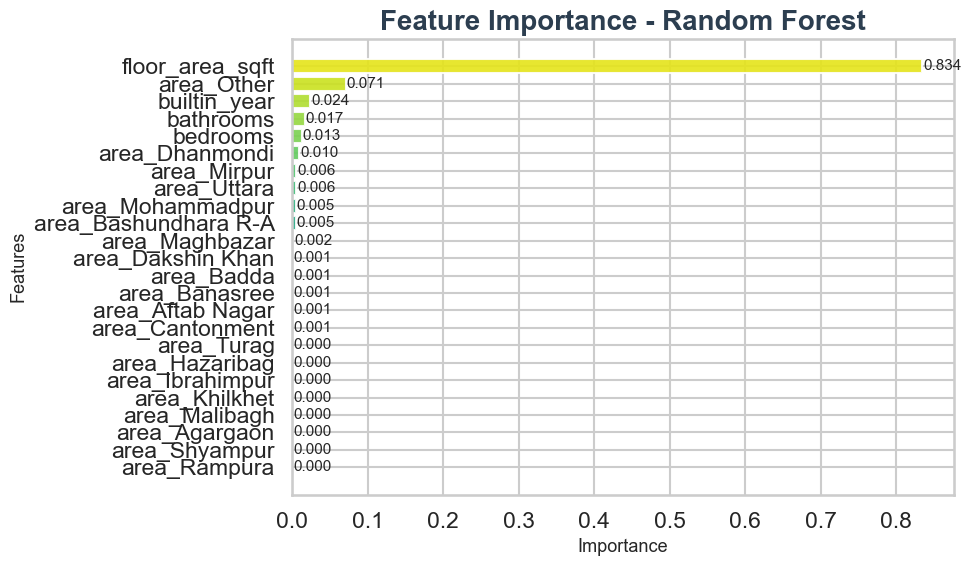

🏆 Top 5 Most Important Features:
            feature  importance
2   floor_area_sqft    0.834397
19       area_Other    0.071272
3      builtin_year    0.024267
1         bathrooms    0.016995
0          bedrooms    0.012552


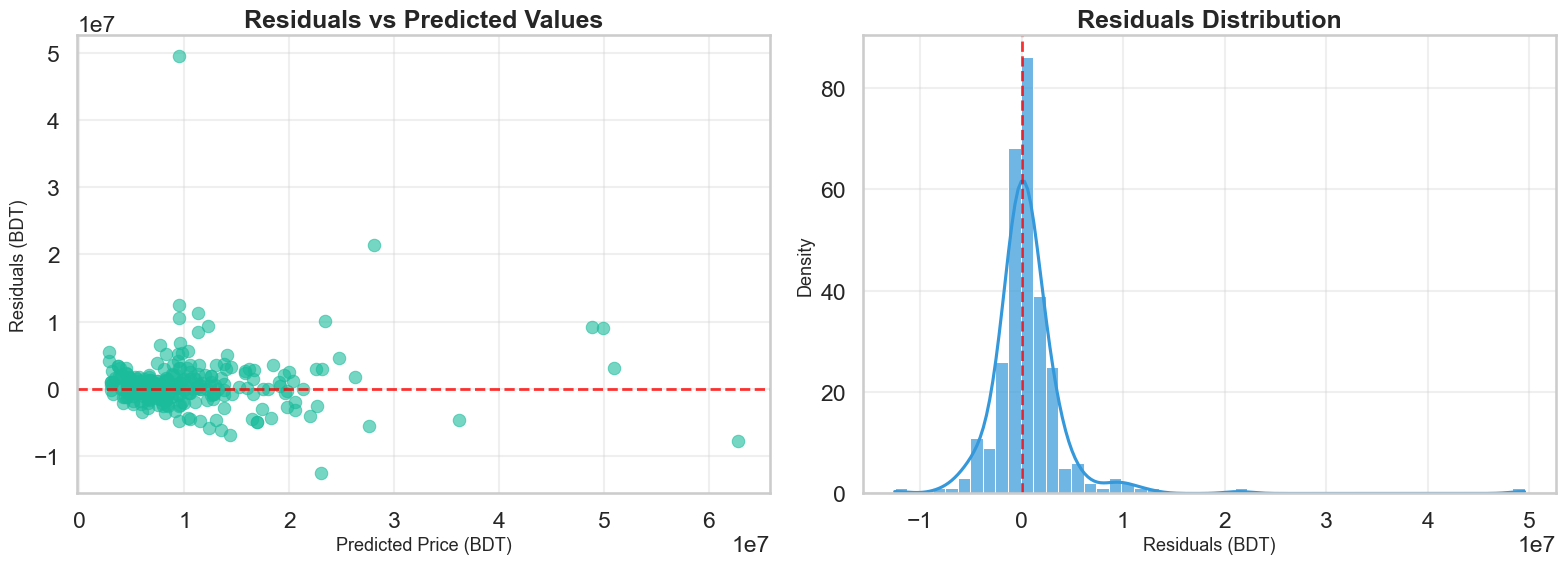

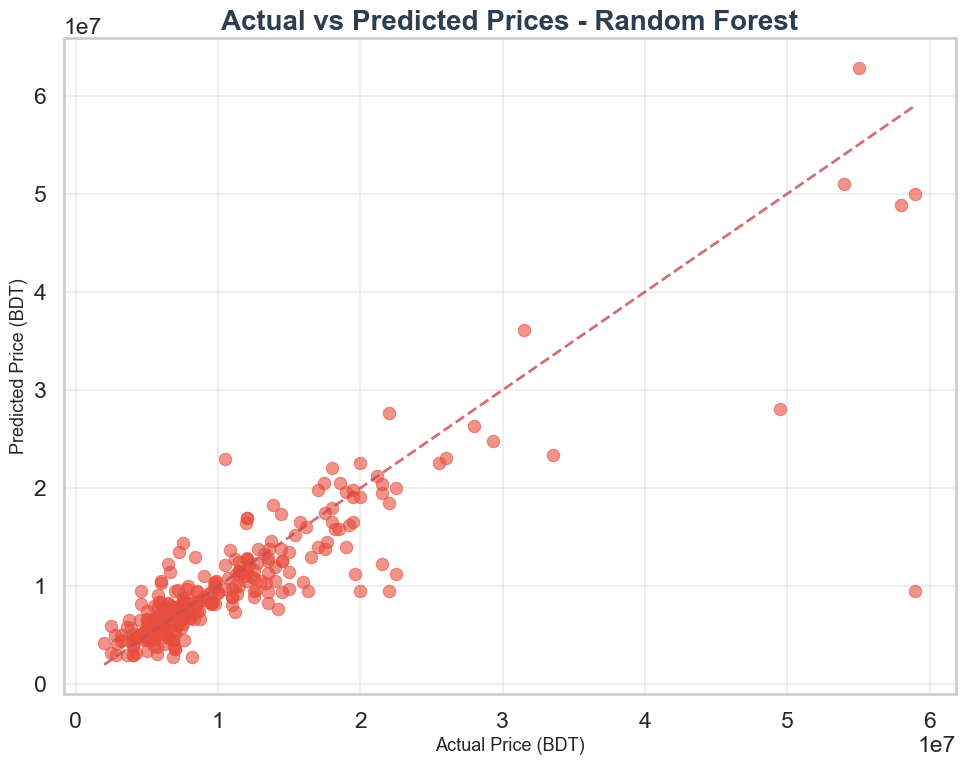

📊 Residuals Statistics:
• Mean: 596594.30
• Std:  4208286.24
• Min:  -12490730.00
• Max:  49527775.09


In [23]:
sns.set_theme(style="whitegrid", context="talk")

# ================================
# 🌟 Feature Importance Analysis
# ================================
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)  # ascending for horizontal barh
    
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("viridis", n_colors=len(feature_importance))
    bars = plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors, alpha=0.9)
    
    plt.title(f'Feature Importance - {best_model_name}', fontsize=20, fontweight="bold", color="#2C3E50")
    plt.xlabel('Importance', fontsize=13)
    plt.ylabel('Features', fontsize=13)

    # Add value labels
    for bar, value in zip(bars, feature_importance['importance']):
        plt.text(value + 0.001, bar.get_y() + bar.get_height()/2,
                 f"{value:.3f}", va='center', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    print("🏆 Top 5 Most Important Features:")
    print(feature_importance.sort_values('importance', ascending=False).head())

# ================================
# 📉 Residual Analysis
# ================================
y_pred_test = best_model.predict(X_test_scaled)
residuals = y_test - y_pred_test

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residuals vs Predicted
sns.scatterplot(x=y_pred_test, y=residuals, ax=axes[0], color="#1ABC9C", alpha=0.6, edgecolor=None)
axes[0].axhline(y=0, color='red', linestyle='--', lw=2, alpha=0.8)
axes[0].set_title("Residuals vs Predicted Values", fontsize=18, fontweight="semibold")
axes[0].set_xlabel("Predicted Price (BDT)", fontsize=13)
axes[0].set_ylabel("Residuals (BDT)", fontsize=13)
axes[0].grid(True, alpha=0.3)

# Residuals distribution
sns.histplot(residuals, bins=50, kde=True, ax=axes[1], color="#3498DB", alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', lw=2, alpha=0.8)
axes[1].set_title("Residuals Distribution", fontsize=18, fontweight="semibold")
axes[1].set_xlabel("Residuals (BDT)", fontsize=13)
axes[1].set_ylabel("Density", fontsize=13)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# 📈 Actual vs Predicted Prices
# ================================
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_test, color="#E74C3C", alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, alpha=0.8)
plt.title(f'Actual vs Predicted Prices - {best_model_name}', fontsize=20, fontweight="bold", color="#2C3E50")
plt.xlabel("Actual Price (BDT)", fontsize=13)
plt.ylabel("Predicted Price (BDT)", fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ================================
# Residual Statistics
# ================================
print("📊 Residuals Statistics:")
print(f"• Mean: {residuals.mean():.2f}")
print(f"• Std:  {residuals.std():.2f}")
print(f"• Min:  {residuals.min():.2f}")
print(f"• Max:  {residuals.max():.2f}")

## 7. Summary and Reporting

In [ ]:
# ================================
# 🏢 DHAKA REAL ESTATE MARKET ANALYSIS - KEY INSIGHTS
# ================================
print("=== DHAKA REAL ESTATE MARKET ANALYSIS - KEY INSIGHTS ===\n")

# ----------------
# Price Insights
# ----------------
print("📊 PRICE INSIGHTS:")
print(f"• Average apartment price: {df_final['price'].mean():,.0f} BDT")
print(f"• Median apartment price: {df_final['price'].median():,.0f} BDT")
print(f"• Price range: {df_final['price'].min():,.0f} - {df_final['price'].max():,.0f} BDT")
print(f"• Average price per sqft: {df_final['price'].sum() / df_final['floor_area_sqft'].sum():,.0f} BDT/sqft")

# ----------------
# Size Insights
# ----------------
print("\n🏠 SIZE INSIGHTS:")
print(f"• Average floor area: {df_final['floor_area_sqft'].mean():.0f} sqft")
print(f"• Most common bedroom count: {df_final['bedrooms'].mode().iloc[0]}")
print(f"• Most common bathroom count: {df_final['bathrooms'].mode().iloc[0]}")

# ----------------
# Location Insights
# ----------------
top_areas = area_stats.head(5)
print("\n📍 TOP LOCATIONS BY AVERAGE PRICE:")
for i, (area, row) in enumerate(top_areas.iterrows(), 1):
    print(f"{i}. {area}: {row['avg_price']:,.0f} BDT (n={int(row['count'])})")

# ----------------
# Model Performance
# ----------------
print(f"\n🤖 MODEL PERFORMANCE:")
print(f"• Best model: {best_model_name}")
print(f"• R² Score: {results_df.loc[best_model_name, 'R2_test']:.3f}")
print(f"• Mean Absolute Error (MAE): {results_df.loc[best_model_name, 'MAE_test']:,.0f} BDT")
print(f"• Root Mean Squared Error (RMSE): {results_df.loc[best_model_name, 'RMSE_test']:,.0f} BDT")

# ----------------
# Feature Importance
# ----------------
if hasattr(best_model, 'feature_importances_'):
    top_features = feature_importance.head(3)
    print("\n🔍 TOP PREDICTIVE FEATURES:")
    for i, (_, row) in enumerate(top_features.iterrows(), 1):
        print(f"{i}. {row['feature']}: {row['importance']:.3f}")

# ----------------
# Business Insights
# ----------------
print("\n💡 BUSINESS INSIGHTS:")
print("• Focus on larger apartments (floor area is key price driver)")
print("• Premium locations command significantly higher prices")
print("• Newer buildings tend to have higher values")
print("• Amenities count positively impacts pricing")
print("• Consider location + size + building age for investment decisions")

# ----------------
# Recommendations
# ----------------
print("\n🎯 RECOMMENDATIONS:")
print("• For buyers: Prioritize Gulshan, Banani, Baridhara for premium properties")
print("• For sellers: Highlight amenities and location in listings")
print("• For investors: Focus on areas with high growth potential")
print("• For developers: Consider 3-4 bedroom apartments in mid-range locations")

# ----------------
# Market Summary
# ----------------
print(f"\n📈 MARKET SUMMARY:")
print(f"• Total apartments analyzed: {len(df_final):,}")
print(f"• Data quality: {(len(df_final)/len(df)*100):.1f}% of original data retained after cleaning")
print(f"• Model accuracy: {results_df.loc[best_model_name, 'R2_test']*100:.1f}% of price variation explained")

print("\n✅ Analysis completed successfully!")

=== DHAKA REAL ESTATE MARKET ANALYSIS - KEY INSIGHTS ===

📊 PRICE INSIGHTS:
• Average apartment price: 10,535,993 BDT
• Median apartment price: 8,000,000 BDT
• Price range: 1,231,231 - 118,000,000 BDT
• Average price per sqft: 7,686 BDT/sqft

🏠 SIZE INSIGHTS:
• Average floor area: 1371 sqft
• Most common bedroom count: 3.0
• Most common bathroom count: 3.0

📍 TOP LOCATIONS BY AVERAGE PRICE:
1. Gulshan: 68,811,111 BDT (n=9)
2. Lalmatia: 27,865,000 BDT (n=8)
3. Dhanmondi: 20,581,603 BDT (n=29)
4. Bashundhara R-A: 17,711,039 BDT (n=165)
5. Uttara: 15,319,483 BDT (n=116)

🤖 MODEL PERFORMANCE:
• Best model: Random Forest
• R² Score: 0.752
• Mean Absolute Error (MAE): 2,107,300 BDT
• Root Mean Squared Error (RMSE): 4,243,248 BDT

🔍 TOP PREDICTIVE FEATURES:
1. area_Rampura: 0.000
2. area_Shyampur: 0.000
3. area_Agargaon: 0.000

💡 BUSINESS INSIGHTS:
• Focus on larger apartments (floor area is key price driver)
• Premium locations command significantly higher prices
• Newer buildings tend to ha